In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [28]:
train_data = pd.read_csv("./train_data.csv")

In [29]:
train_data.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,4a122afe-6e52-4ed0-840d-66155da95ba1,2259.833995,67.884986,1058.573968,31.799362,99.017120,10.507787,0.315652,0.982880,3328.915749,...,-0.812408,-0.156490,-0.000055,-0.000191,0.017395,0.007729,0.007729,2.250533,-0.812408,-0.156490
1,0848f722-52ec-420c-adb1-a1e90a2e2709,2430.367576,60.980572,1541.466293,38.677070,99.122594,13.644635,0.342359,0.877406,3985.478504,...,0.014594,-0.595771,-0.000035,-0.000671,0.021513,0.011262,0.011262,1.910181,0.014594,-0.595771
2,7814286a-f939-45a7-8620-82b339a7ad4b,989.800997,27.651929,2478.164707,69.232133,95.693128,111.535043,3.115939,4.306872,3579.500746,...,-0.470107,0.170303,0.000080,-0.001355,0.029976,0.015781,0.015781,1.899494,-0.470107,0.170303
3,de843d67-0ed3-4dfe-af91-78923dc31810,2025.914557,57.014236,1464.561241,41.216368,95.883762,62.872820,1.769396,4.116238,3553.348618,...,0.176038,-0.506675,0.000024,0.000587,0.023851,0.011562,0.011562,2.062848,0.176038,-0.506675
4,ba117ec1-3de8-4da3-a315-4c7716589439,1576.443907,71.274370,619.624143,28.014521,97.524479,15.728281,0.711109,2.475521,2211.796331,...,0.410326,0.208714,-0.000109,-0.000151,0.014282,0.007043,0.007043,2.027828,0.410326,0.208714


In [30]:
train_data.isna().sum()

uuid                 0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
SD1                  0
SD2                  0
sampen               0
higuci               0
datasetId            0
condition            0
MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
dtype: int64

In [31]:
# Display basic information about the dataset
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uuid               5000 non-null   object 
 1   VLF                5000 non-null   float64
 2   VLF_PCT            5000 non-null   float64
 3   LF                 5000 non-null   float64
 4   LF_PCT             5000 non-null   float64
 5   LF_NU              5000 non-null   float64
 6   HF                 5000 non-null   float64
 7   HF_PCT             5000 non-null   float64
 8   HF_NU              5000 non-null   float64
 9   TP                 5000 non-null   float64
 10  LF_HF              5000 non-null   float64
 11  HF_LF              5000 non-null   float64
 12  SD1                5000 non-null   float64
 13  SD2                5000 non-null   float64
 14  sampen             5000 non-null   float64
 15  higuci             5000 non-null   float64
 16  datasetId          5000 

In [32]:
# Summary statistics
print(train_data.describe())

                VLF      VLF_PCT           LF       LF_PCT        LF_NU  \
count   5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean    2242.846274    64.618473   944.666618    33.756563    95.513467   
std     1853.845285    16.858102   572.705322    16.121002     4.200091   
min      182.001656    19.492924   105.352082     2.218141    70.677164   
25%     1009.686180    52.998781   547.027436    21.775991    93.560684   
50%     1705.183308    66.792593   779.619006    31.364370    96.583947   
75%     2678.847972    77.328811  1199.089822    44.458585    98.758406   
max    12278.649761    97.703187  3211.424686    77.507972    99.986873   

                HF       HF_PCT        HF_NU            TP        LF_HF  ...  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.000000  ...   
mean     39.787329     1.624964     4.486533   3227.300221   111.958521  ...   
std      46.887627     1.793648     4.200091   1957.986129   330.772146  ...   
min 

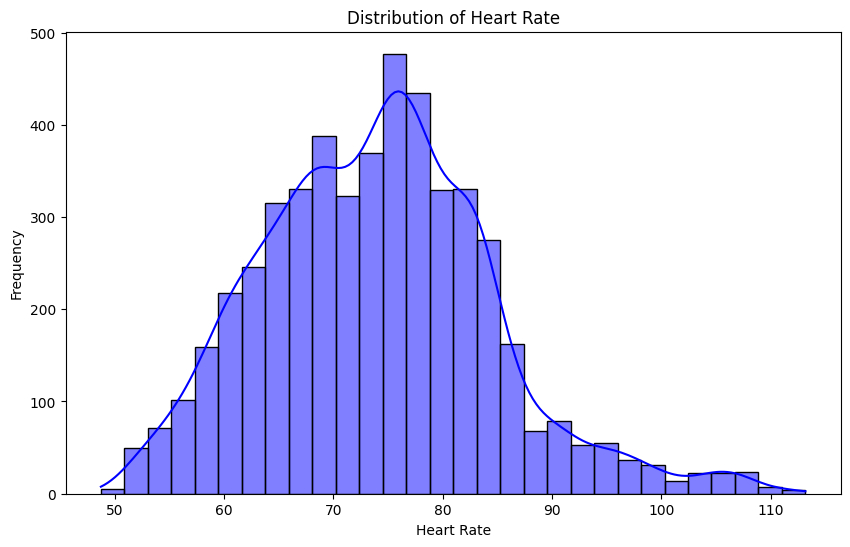

In [33]:

# Visualize the distribution of the target variable (HR)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['HR'], bins=30, kde=True, color='blue')
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

## PREPROCESSING THE DATA

In [34]:
def preprocess_data(data):
    # Drop unnecessary columns and handle missing values
    processed_data = data.drop(columns=['uuid', 'datasetId', 'condition'])
    processed_data.fillna(processed_data.mean(), inplace=True)  # Filling missing values with mean

    # Scale/normalize numerical features
    scaler = StandardScaler()
    processed_data_scaled = pd.DataFrame(scaler.fit_transform(processed_data), columns=processed_data.columns)

    return processed_data_scaled

In [35]:
# Preprocess the training data
processed_train_data = preprocess_data(train_data)

In [36]:
# Drop unnecessary columns (you can modify this based on your analysis)
X = train_data.drop(columns=['HR'])
y = train_data['HR']

In [37]:
X

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,4a122afe-6e52-4ed0-840d-66155da95ba1,2259.833995,67.884986,1058.573968,31.799362,99.017120,10.507787,0.315652,0.982880,3328.915749,...,-0.812408,-0.156490,-0.000055,-0.000191,0.017395,0.007729,0.007729,2.250533,-0.812408,-0.156490
1,0848f722-52ec-420c-adb1-a1e90a2e2709,2430.367576,60.980572,1541.466293,38.677070,99.122594,13.644635,0.342359,0.877406,3985.478504,...,0.014594,-0.595771,-0.000035,-0.000671,0.021513,0.011262,0.011262,1.910181,0.014594,-0.595771
2,7814286a-f939-45a7-8620-82b339a7ad4b,989.800997,27.651929,2478.164707,69.232133,95.693128,111.535043,3.115939,4.306872,3579.500746,...,-0.470107,0.170303,0.000080,-0.001355,0.029976,0.015781,0.015781,1.899494,-0.470107,0.170303
3,de843d67-0ed3-4dfe-af91-78923dc31810,2025.914557,57.014236,1464.561241,41.216368,95.883762,62.872820,1.769396,4.116238,3553.348618,...,0.176038,-0.506675,0.000024,0.000587,0.023851,0.011562,0.011562,2.062848,0.176038,-0.506675
4,ba117ec1-3de8-4da3-a315-4c7716589439,1576.443907,71.274370,619.624143,28.014521,97.524479,15.728281,0.711109,2.475521,2211.796331,...,0.410326,0.208714,-0.000109,-0.000151,0.014282,0.007043,0.007043,2.027828,0.410326,0.208714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9d0cdd26-be7a-46c9-ab06-583353fed053,280.203042,45.872839,292.072634,47.816044,88.340202,38.549921,6.311118,11.659798,610.825597,...,1.017555,0.080956,-0.000115,-0.000021,0.013250,0.008774,0.008774,1.510132,1.017555,0.080956
4996,c8e966ee-290c-445b-ab9f-f708465381ec,380.738037,34.412253,636.886413,57.563717,87.765963,88.778062,8.024029,12.234037,1106.402513,...,-0.149572,-0.454435,-0.000010,-0.000396,0.019709,0.013093,0.013093,1.505353,-0.149572,-0.454435
4997,ee4f93f6-1da2-446f-a682-66a6f6a80e27,3984.432206,97.335562,105.352082,2.573643,96.592332,3.716702,0.090795,3.407668,4093.500990,...,-1.610695,-0.476207,-0.000068,0.000678,0.011778,0.004643,0.004643,2.536733,-1.610695,-0.476207
4998,afaecca1-7686-4a3e-9d96-59357bcb29a8,1436.829269,78.868209,378.173100,20.758093,98.231585,6.808066,0.373698,1.768415,1821.810435,...,-0.311388,0.011621,0.000065,-0.000103,0.011439,0.005135,0.005135,2.227645,-0.311388,0.011621


C:\Users\danus\AppData\Local\Temp\ipykernel_10000\3467352064.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')


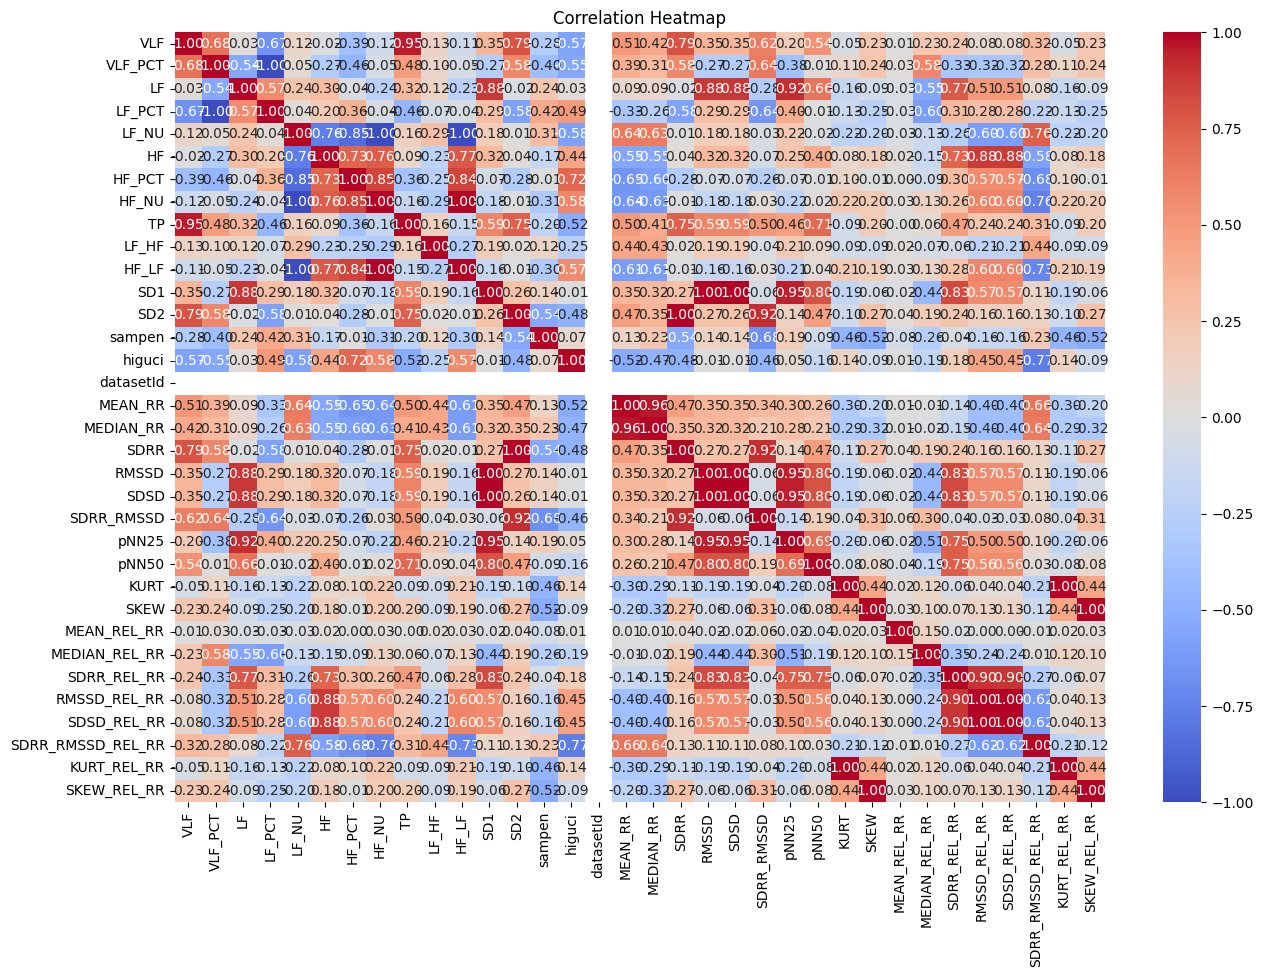

In [38]:
# Correlation heatmap for numerical features
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

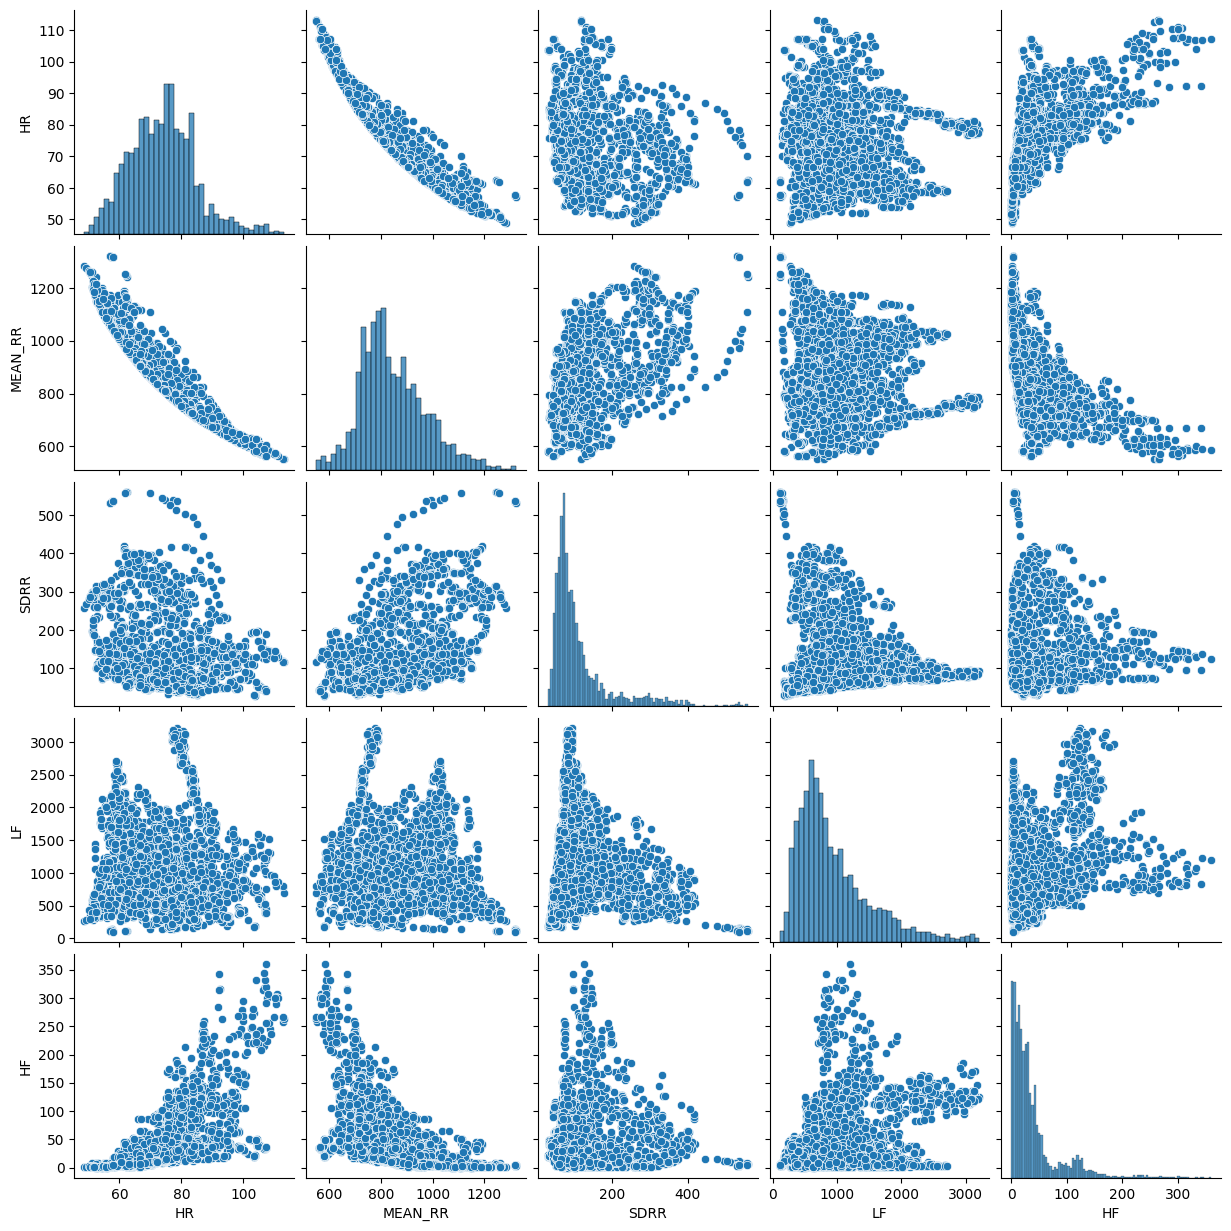

In [40]:
# Pairplot for selected features
selected_features = ['HR', 'MEAN_RR', 'SDRR', 'LF', 'HF']
sns.pairplot(train_data[selected_features])
plt.show()


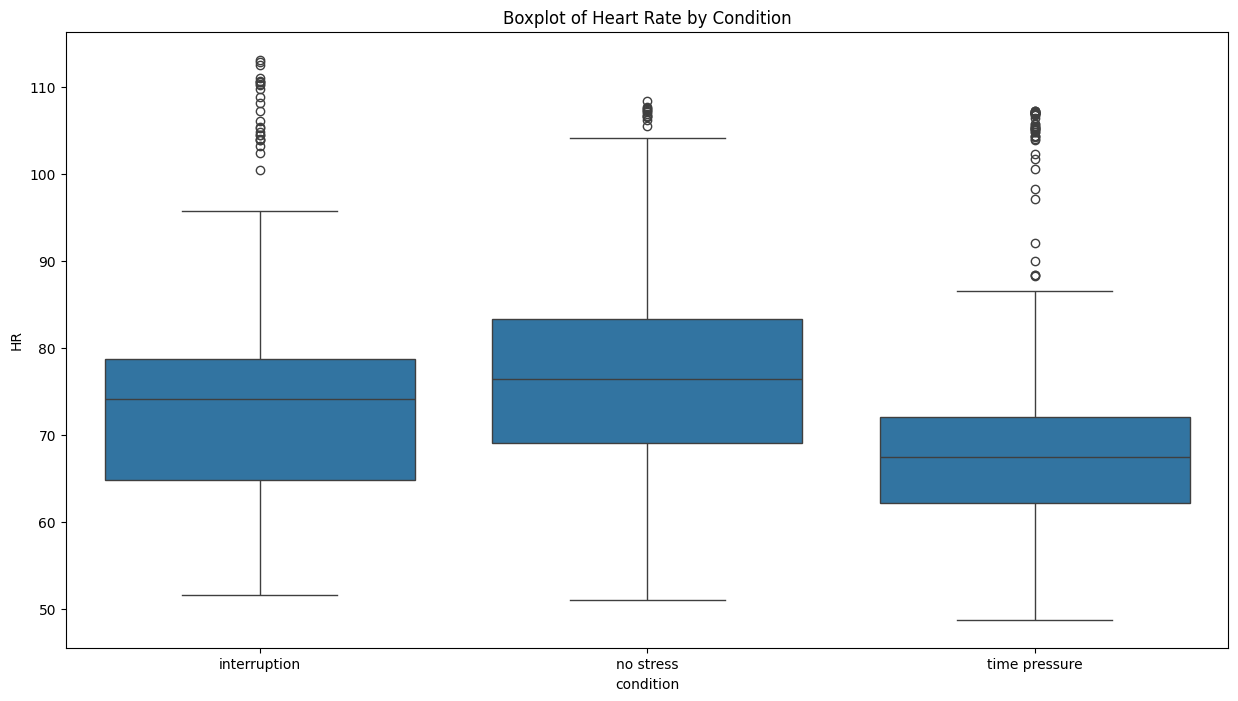

In [42]:
# Boxplots for categorical features
plt.figure(figsize=(15, 8))
sns.boxplot(x='condition', y='HR', data=train_data)
plt.title('Boxplot of Heart Rate by Condition')
plt.show()

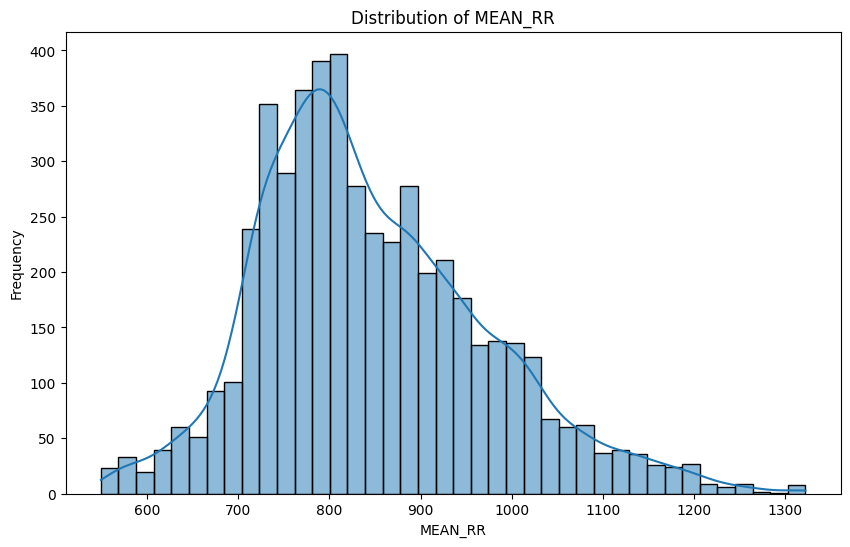

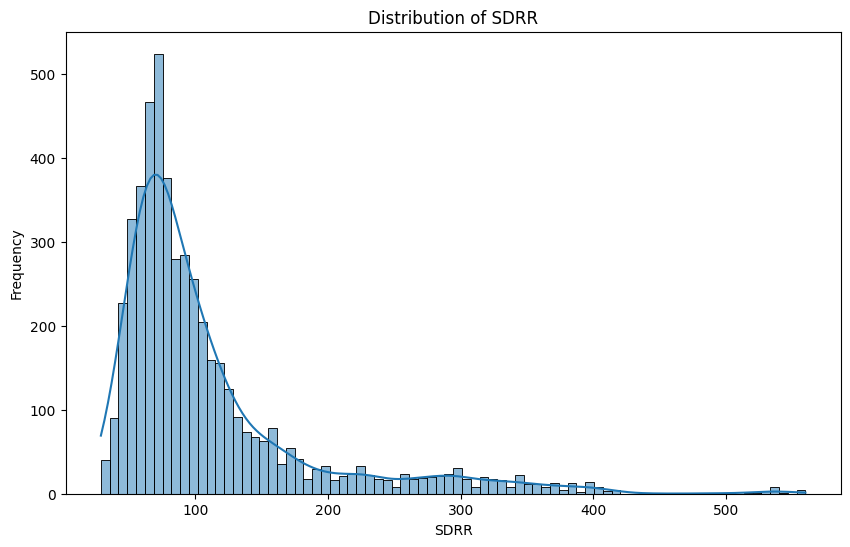

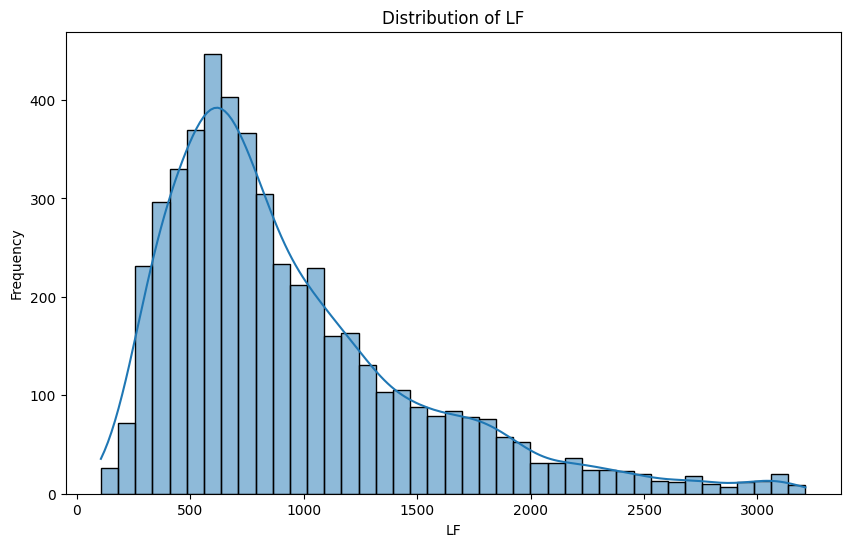

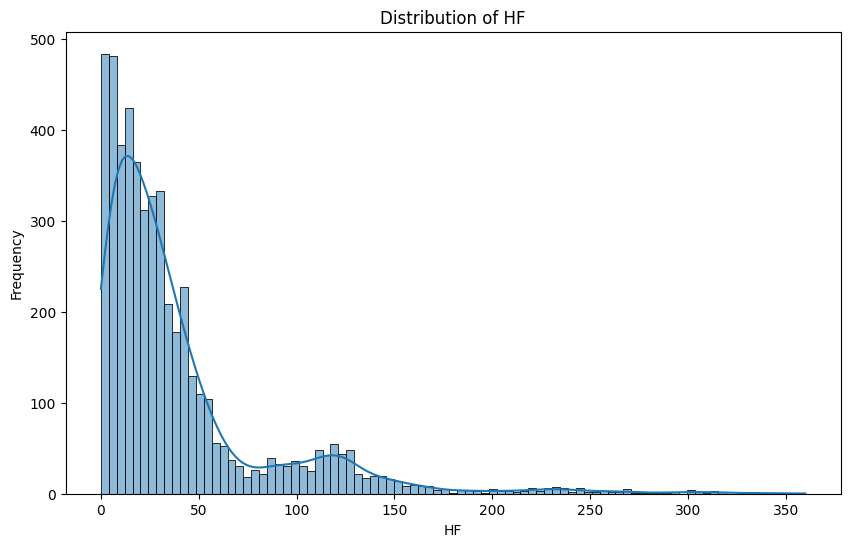

In [43]:
# Explore the distribution of some selected features
selected_features = ['MEAN_RR', 'SDRR', 'LF', 'HF']
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

### Feature Selection

In [44]:
# Check the column names in the dataset
print(train_data.columns)

Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'datasetId', 'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD',
       'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW',
       'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR',
       'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR'],
      dtype='object')


In [45]:
# Selecting necessary feature columns
selected_features = [
    'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD',
    'pNN25', 'pNN50', 'KURT', 'SKEW',
    'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
    'KURT_REL_RR', 'SKEW_REL_RR',
    'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
    'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci'
]


In [46]:
# Add the target variable (Heart Rate) to the selected features
selected_features_with_target = selected_features + ['HR']

In [47]:
# Create a subset of the data with selected features
selected_data = train_data[selected_features_with_target]

In [48]:
# Display basic information about the selected dataset
print(selected_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEAN_RR            5000 non-null   float64
 1   MEDIAN_RR          5000 non-null   float64
 2   SDRR               5000 non-null   float64
 3   RMSSD              5000 non-null   float64
 4   SDSD               5000 non-null   float64
 5   SDRR_RMSSD         5000 non-null   float64
 6   pNN25              5000 non-null   float64
 7   pNN50              5000 non-null   float64
 8   KURT               5000 non-null   float64
 9   SKEW               5000 non-null   float64
 10  MEAN_REL_RR        5000 non-null   float64
 11  MEDIAN_REL_RR      5000 non-null   float64
 12  SDRR_REL_RR        5000 non-null   float64
 13  RMSSD_REL_RR       5000 non-null   float64
 14  SDSD_REL_RR        5000 non-null   float64
 15  SDRR_RMSSD_REL_RR  5000 non-null   float64
 16  KURT_REL_RR        5000 

In [49]:
# Summary statistics
print(selected_data.describe())

           MEAN_RR    MEDIAN_RR         SDRR        RMSSD         SDSD  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean    846.784823   841.682249   110.375627    15.010186    15.009439   
std     126.347739   134.461651    77.401898     4.123567     4.123548   
min     549.441044   518.079375    28.675515     5.551126     5.551113   
25%     759.378406   753.676954    64.386659    11.859738    11.859628   
50%     824.282170   820.709035    83.801885    14.409668    14.408702   
75%     924.941102   918.349305   121.531942    17.956454    17.956430   
max    1321.857001  1653.122250   559.881621    26.623217    26.623033   

        SDRR_RMSSD        pNN25        pNN50         KURT         SKEW  ...  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  ...   
mean      7.442267     9.885133     0.882307     0.564676     0.070378  ...   
std       5.091802     8.156332     1.003129     1.738594     0.706996  ...   
min       2.70385

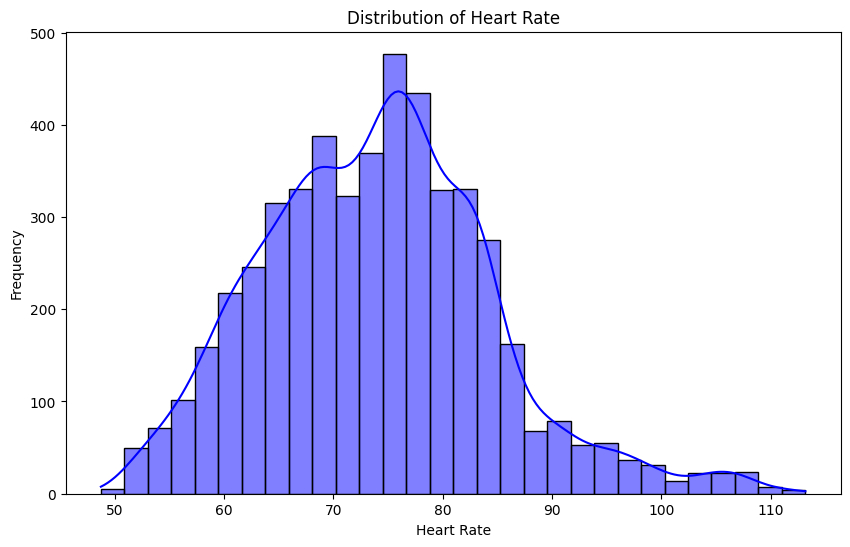

In [50]:
# Visualize the distribution of the target variable (HR)
plt.figure(figsize=(10, 6))
sns.histplot(selected_data['HR'], bins=30, kde=True, color='blue')
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()


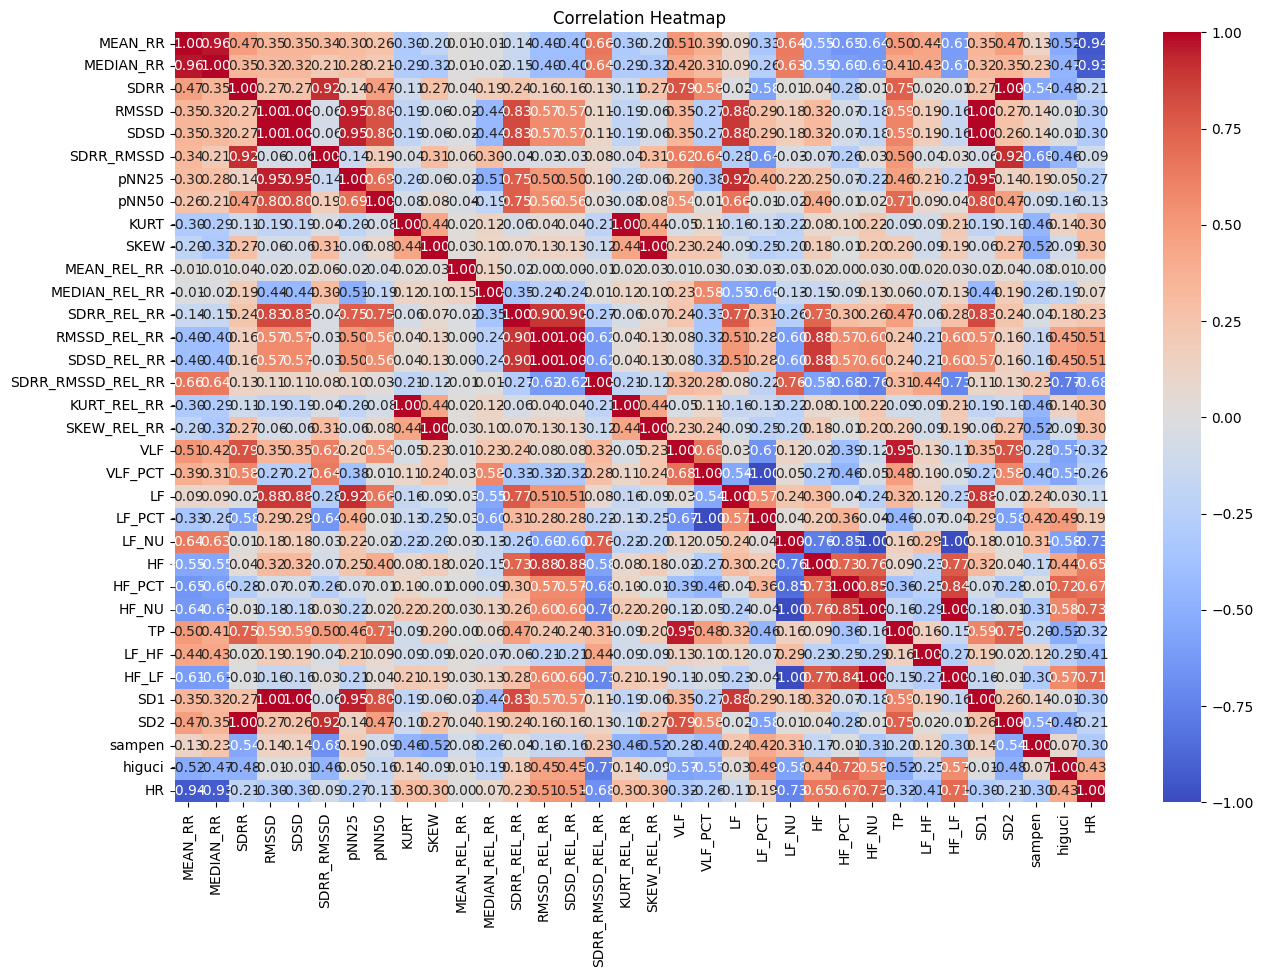

In [51]:
# Correlation heatmap for selected features
plt.figure(figsize=(15, 10))
sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Data Preprocessing

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [53]:
# Encode categorical variables
label_encoder = LabelEncoder()
train_data['condition'] = label_encoder.fit_transform(train_data['condition'])

In [54]:
# Split the data into features and target variable
X = train_data.drop(['uuid', 'HR', 'datasetId'], axis=1)
y = train_data['HR']


In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VLF                5000 non-null   float64
 1   VLF_PCT            5000 non-null   float64
 2   LF                 5000 non-null   float64
 3   LF_PCT             5000 non-null   float64
 4   LF_NU              5000 non-null   float64
 5   HF                 5000 non-null   float64
 6   HF_PCT             5000 non-null   float64
 7   HF_NU              5000 non-null   float64
 8   TP                 5000 non-null   float64
 9   LF_HF              5000 non-null   float64
 10  HF_LF              5000 non-null   float64
 11  SD1                5000 non-null   float64
 12  SD2                5000 non-null   float64
 13  sampen             5000 non-null   float64
 14  higuci             5000 non-null   float64
 15  condition          5000 non-null   int32  
 16  MEAN_RR            5000 

In [56]:
y

0       72.947850
1       63.063063
2       83.191736
3       80.828414
4       76.299115
          ...    
4995    83.920808
4996    79.969017
4997    57.844321
4998    66.656028
4999    83.364080
Name: HR, Length: 5000, dtype: float64

In [57]:
X

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,2259.833995,67.884986,1058.573968,31.799362,99.017120,10.507787,0.315652,0.982880,3328.915749,100.741860,...,-0.812408,-0.156490,-0.000055,-0.000191,0.017395,0.007729,0.007729,2.250533,-0.812408,-0.156490
1,2430.367576,60.980572,1541.466293,38.677070,99.122594,13.644635,0.342359,0.877406,3985.478504,112.972337,...,0.014594,-0.595771,-0.000035,-0.000671,0.021513,0.011262,0.011262,1.910181,0.014594,-0.595771
2,989.800997,27.651929,2478.164707,69.232133,95.693128,111.535043,3.115939,4.306872,3579.500746,22.218709,...,-0.470107,0.170303,0.000080,-0.001355,0.029976,0.015781,0.015781,1.899494,-0.470107,0.170303
3,2025.914557,57.014236,1464.561241,41.216368,95.883762,62.872820,1.769396,4.116238,3553.348618,23.294028,...,0.176038,-0.506675,0.000024,0.000587,0.023851,0.011562,0.011562,2.062848,0.176038,-0.506675
4,1576.443907,71.274370,619.624143,28.014521,97.524479,15.728281,0.711109,2.475521,2211.796331,39.395541,...,0.410326,0.208714,-0.000109,-0.000151,0.014282,0.007043,0.007043,2.027828,0.410326,0.208714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,280.203042,45.872839,292.072634,47.816044,88.340202,38.549921,6.311118,11.659798,610.825597,7.576478,...,1.017555,0.080956,-0.000115,-0.000021,0.013250,0.008774,0.008774,1.510132,1.017555,0.080956
4996,380.738037,34.412253,636.886413,57.563717,87.765963,88.778062,8.024029,12.234037,1106.402513,7.173917,...,-0.149572,-0.454435,-0.000010,-0.000396,0.019709,0.013093,0.013093,1.505353,-0.149572,-0.454435
4997,3984.432206,97.335562,105.352082,2.573643,96.592332,3.716702,0.090795,3.407668,4093.500990,28.345584,...,-1.610695,-0.476207,-0.000068,0.000678,0.011778,0.004643,0.004643,2.536733,-1.610695,-0.476207
4998,1436.829269,78.868209,378.173100,20.758093,98.231585,6.808066,0.373698,1.768415,1821.810435,55.547805,...,-0.311388,0.011621,0.000065,-0.000103,0.011439,0.005135,0.005135,2.227645,-0.311388,0.011621


In [58]:
# Standardize features (optional but can be beneficial for some algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
X_scaled[0]

array([ 0.00916442,  0.19378455,  0.19891336, -0.12141903,  0.83426855,
       -0.62452448, -0.7300446 , -0.83426855,  0.05190317, -0.03391393,
       -0.7790359 , -0.03077087,  0.06080015,  0.76003559, -0.35109983,
       -1.34840561, -0.06181281,  0.05573091,  0.05970923, -0.0309391 ,
       -0.03077087,  0.05590918, -0.1821017 , -0.74671146, -0.79214687,
       -0.32092317, -0.3353696 ,  0.29211537, -0.2273415 , -0.51322291,
       -0.51321868,  0.64879377, -0.79214687, -0.32092317])

### Model Building

In [53]:
!pip install joblib

In [60]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
import joblib
import argparse

In [61]:
# Choose algorithms and hyperparameters for GridSearchCV
param_grid = {
    'random_forest': {
        'model': [RandomForestRegressor()],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20],
    },
    'gradient_boosting': {
        'model': [GradientBoostingRegressor()],
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
    },
    'svm': {
        'model': [SVR()],
        'model__kernel': ['linear', 'rbf'],
        'model__C': [1, 10, 100],
    }
}

In [62]:
# Create a pipeline with a scaler and regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())  
])

In [63]:



# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_scaled, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', RandomForestRegressor())]),
             param_grid=[{'model': [RandomForestRegressor()],
                          'model__max_depth': [None, 10, 20],
                          'model__n_estimators': [50, 100, 200]},
                         {'model': [GradientBoostingRegressor()],
                          'model__learning_rate': [0.01, 0.1, 0.2],
                          'model__n_estimators': [50, 100, 200]},
                         {'model': [SVR()], 'model__C': [1, 10, 100],
                          'model__kernel': ['linear', 'rbf']}],
             scoring='neg_mean_squared_error')

In [64]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Save the best model to a file
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [65]:
def predict_heart_rate(model, test_data_file):
    # Load test data
    test_data = pd.read_csv(test_data_file)

    # Preprocess the test data
    test_data['condition'] = label_encoder.transform(test_data['condition'])
    test_data_scaled = scaler.transform(test_data.drop(['uuid', 'datasetId'], axis=1))

    # Make predictions
    test_predictions = model.predict(test_data_scaled)

    # Create a DataFrame with the predictions
    results_df = pd.DataFrame({'uuid': test_data['uuid'], 'predicted_HR': test_predictions})

    # Save predictions to results.csv
    results_df.to_csv('results.csv', index=False)

In [66]:
test = pd.read_csv('./sample_test_data.csv')

In [67]:
test.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,1ae30e0b-098e-46fc-a897-0a6661f26370,1038.142757,43.053026,1316.747853,54.607113,95.891158,56.421352,2.339861,4.108842,2411.311962,...,-0.165101,-0.224105,-0.000032,-0.000942,0.022748,0.012756,0.012756,1.783259,-0.165101,-0.224105
1,428b41b3-9461-4c79-ab4e-d03b122b2553,1069.353244,27.758342,2663.293874,69.133958,95.698188,119.720039,3.107701,4.301812,3852.367156,...,-0.729494,0.169267,0.000129,-0.002245,0.031830,0.017082,0.017082,1.863380,-0.729494,0.169267
2,88f82ac7-02dd-447e-a289-22e8e22432c2,1044.054317,62.673708,618.715329,37.140964,99.503494,3.087286,0.185327,0.496506,1665.856933,...,0.408727,-0.099498,-0.000022,0.000121,0.012729,0.005996,0.005996,2.122806,0.408727,-0.099498
3,1d09b18f-d82f-4c1a-bb2d-71fda6fea837,4587.562353,73.598925,1622.011912,26.022171,98.564819,23.617762,0.378903,1.435181,6233.192027,...,6.720692,2.506984,-0.000093,-0.001052,0.022455,0.011130,0.011130,2.017539,6.720692,2.506984
4,a6302640-f70a-4a3a-ad36-a8c3d5df9400,1837.820853,49.193639,1873.914322,50.159766,98.727334,24.156100,0.646595,1.272666,3735.891274,...,-0.320871,-0.007052,0.000090,-0.000726,0.023134,0.012082,0.012082,1.914702,-0.320871,-0.007052


In [68]:
test.columns

Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'datasetId', 'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD',
       'SDSD', 'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR'],
      dtype='object')

In [69]:
set(data.columns) - set(test.columns)

{'HR'}

In [70]:
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
def evaluate_model(model, test_data_file):

    # Preprocess the test data (you might need to adjust this based on your preprocessing steps)
    test_data['condition'] = label_encoder.fit_transform(test_data['condition'])
    test_data_scaled = scaler.fit_transform(test_data.drop(['uuid', 'datasetId'], axis=1))

    y_true_generate = pd.read_csv('./sample_output_generated.csv')
    # Extract ground truth labels
    y_true = y_true_generate['HR']

    # Make predictions
    y_pred = model.predict(test_data_scaled)

    # Print metrics
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

In [73]:
# Load test data
test_data = pd.read_csv('./sample_test_data.csv')

best_model = joblib.load('best_model.pkl')

# Encode categorical variables 
label_encoder = LabelEncoder()

 # Standardize features 
scaler = StandardScaler()

# Evaluate the model on the test data
evaluate_model(best_model, test_data)

Mean Squared Error: 45.13877281281739
R-squared: 0.2888725587191445
